# Database Info

The following example demonstrates how to extract information from the datasets `*_Info.md`, and summarize information from several datsets in the database.

We utilize `pandas` for representation of data tables and `matplotlib` for visualization of data.

In [1]:
import os, glob, pandas, matplotlib, numpy
import matplotlib.pyplot as plt

First, we download some example data from the `lapdMouse` data archive using the `lapdMouseUtils` module which is part of the [lapdMousePythonExamples](https://github.com/lapdMouse/lapdMousePythonExamples).

In [2]:
from lapdMouseUtils import DBUtil
db=DBUtil()
for i in range(1,11):
  db.downloadFile('m%02d/m%02d_Info.md'%(i,i))

## Parsing data from Info.md
General information about the dataset, including mouse physiological parameters, aerosol dosing, notes about data acquisition and processing, and other findings are stored in Markdown files following a specific template that allows parsing for specific entries. We define a function `getInfo` that parses such an `*_Info.md` files and returns it as a dictionary.

In [3]:
def getInfo(infoFilename):
  info = {}
  StringValues = ['Gender', 'Strain', 'Vendor']#, 'Physical abnormalities']
  FloatValues = ['Particle size', 'Exposure time', 'Relative exposure estimate',\
    'Total centerline length', 'Number of branches' ' Number of terminal branches',\
    'Maximum generation number', 'Number of outlet areas', 'Weight (g)', 'Lung volume']
  keys = StringValues
  keys.extend(FloatValues)
  for line in open(infoFilename,'r').read().split('\n'):
    for key in keys:
      if line.find(key+': ')!=-1:
        data = line[line.find(key+': ')+len(key)+2:]
        if key in FloatValues:
          try:
            data = float(data.split(' ')[0])
          except ValueError:
            data = float('nan')
        info[key] = data
  return info

This allows parsing an `Info.md` files, and return a set general information of as a python dictionary:

In [4]:
info = getInfo('./m01/m01_Info.md')
for key, value in info.items():
  print(key+': '+str(value))

Vendor: Charles Rivers
Total centerline length: 658.742
Gender: Male
Number of outlet areas: 2004.0
Lung volume: 1154.35
Weight (g): nan
Relative exposure estimate: 109000000.0
Particle size: 1.0
Strain: B6C3F1
Exposure time: 10.0
Maximum generation number: 25.0


## Summarzing all Info.md files from database
below we first search for all `*_Info.md` files in the database, parse them using `getInfo` defined above, and summarize results in a table (pandas dataframe).

In [5]:
infoFiles = glob.glob(os.path.join('.','*/*_Info.md'))
databaseInfo = {os.path.basename(i)[:3]: getInfo(i) for i in infoFiles}
df = pandas.DataFrame.from_dict(databaseInfo, orient='index')
df.head(10)

,Vendor,Total centerline length,Gender,Number of outlet areas,Lung volume,Weight (g),Relative exposure estimate,Particle size,Strain,Exposure time,Maximum generation number
m01,Charles Rivers,658.742,Male,2004,1154.35,NaN,109000000,1,B6C3F1,10,25
m02,Charles Rivers,586.798,Female,1817,1067.14,19.5,74300000,1,B6C3F1,10,24
m03,Jackson Labs,556.905,Male,1725,1142.07,23.8,NaN,1,BALB/c,10,25
m04,Charles Rivers,453.592,Male,1167,1224.19,24.4,265000000,1,CD-1,10,24
m05,Charles Rivers,569.515,Male,1709,1211.22,NaN,NaN,1,CD-1,10,23
m06,Charles Rivers,605.276,Female,1912,1103.35,21.0,124000000,1,B6C3F1,10,25
m07,Jackson Labs,571.870,Male,1680,1116.76,24.1,NaN,1,C57BL/6,10,27
m08,Jackson Labs,597.903,Female,1995,1055.43,23.0,NaN,1,C57BL/6,10,25
m09,Jackson Labs,529.485,Female,1810,1128.40,23.7,137000000,1,BALB/c,10,26
m10,Jackson Labs,524.425,Female,1797,1144.66,NaN,112000000,1,BALB/c,10,25


This allow us now to search for datasets with specific characteristics or idenfity patterns.

The example below plots the mice's weight vs. lung volume color coded by mouse strains.

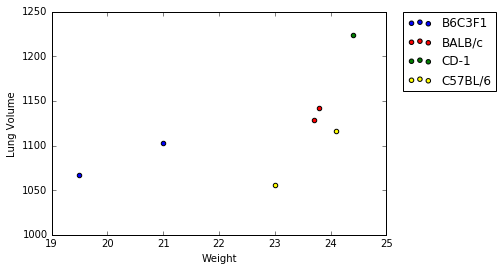

In [6]:
strains = df['Strain'].unique()
fig, ax = plt.subplots()
colors = {'B6C3F1': 'blue', 'BALB/c':'red', 'CD-1':'green', 'C57BL/6':'yellow'}
for i in strains:
  plt.scatter(\
    df.loc[df['Strain']==i,'Weight (g)'].values,\
    df.loc[df['Strain']==i,'Lung volume'].values,\
    c=colors[i], label=i)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
plt.xlabel('Weight')
plt.ylabel('Lung Volume');

The example below shows boxplots of the the mice's weight grouped by gender.

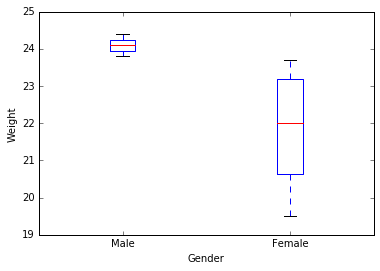

In [7]:
genders = df['Gender'].unique()
plt.figure()
data = [df.loc[df['Gender']==i,'Weight (g)'].dropna().values for i in genders]
plt.boxplot(data, labels=genders)
plt.xlabel('Gender')
plt.ylabel('Weight');